In [ ]:
# Importing Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Displaying data
csv_file_path = "/content/twitter_sentiment_data.csv"

data = pd.read_csv(csv_file_path)

data.head()


,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


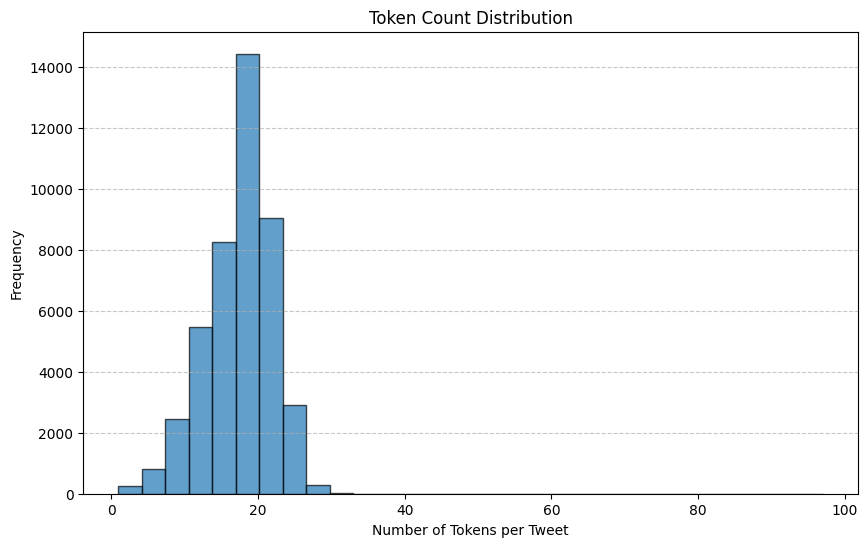

In [ ]:
# Tokenize
data["tokenized_tweet"] = data["message"].apply(lambda x: x.split())

# Count the number of tokens per tweet
data["token_count"] = data["tokenized_tweet"].apply(len)

# histogram
plt.figure(figsize=(10, 6))
plt.hist(data["token_count"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Number of Tokens per Tweet")
plt.ylabel("Frequency")
plt.title("Token Count Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

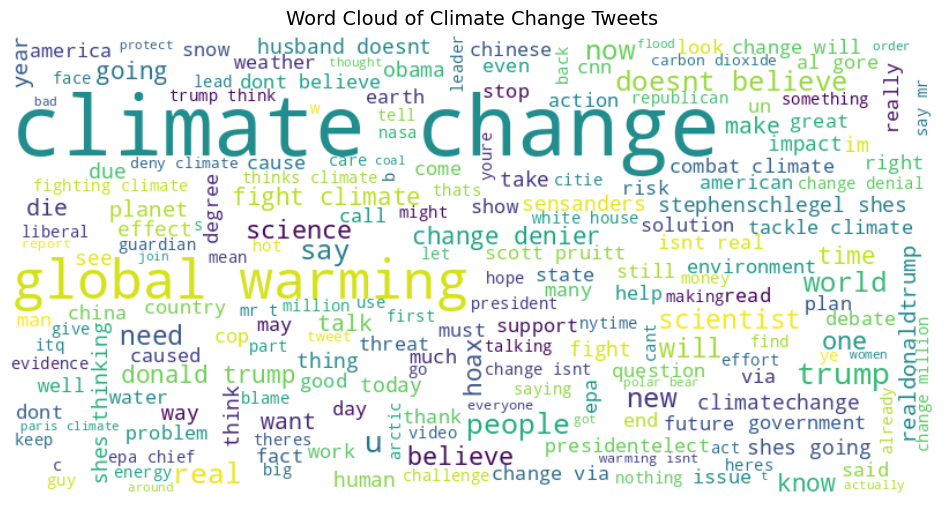

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import re
# word cloud
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s#]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# cleaning
data["cleaned_message"] = data["message"].dropna().apply(clean_text)
cleaned_text = " ".join(data["cleaned_message"])

# take away random words
custom_stopwords = set(STOPWORDS) | {"rt", "co", "amp"}

# the actual word clooud
wordcloud_cleaned = WordCloud(
    width=800, height=400, background_color="white", colormap="viridis",
    stopwords=custom_stopwords
).generate(cleaned_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_cleaned, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Climate Change Tweets", fontsize=14)
plt.show()

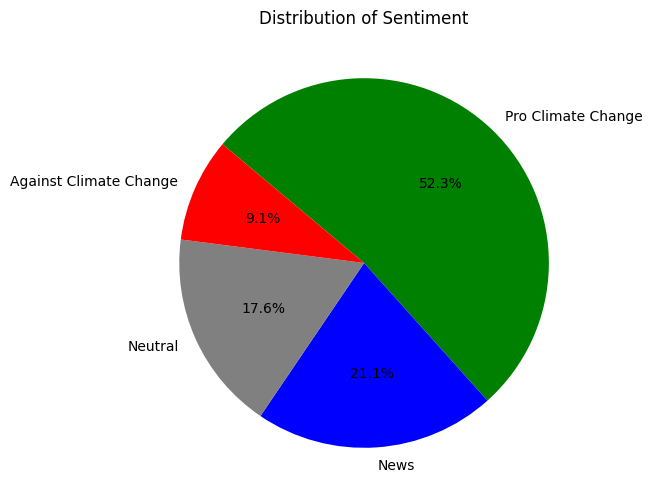

In [ ]:
# Count the number of tweets per sentiment
sentiment_counts = data["sentiment"].value_counts()
labels = ["Pro Climate Change", "News", "Neutral", "Against Climate Change"]
colors = ["green", "blue", "gray", "red"]

# pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts,
    labels=labels,
    colors=colors,
    autopct="%1.1f%%",
    startangle=140,
    counterclock=False
)
plt.title("Distribution of Sentiment")
plt.show()

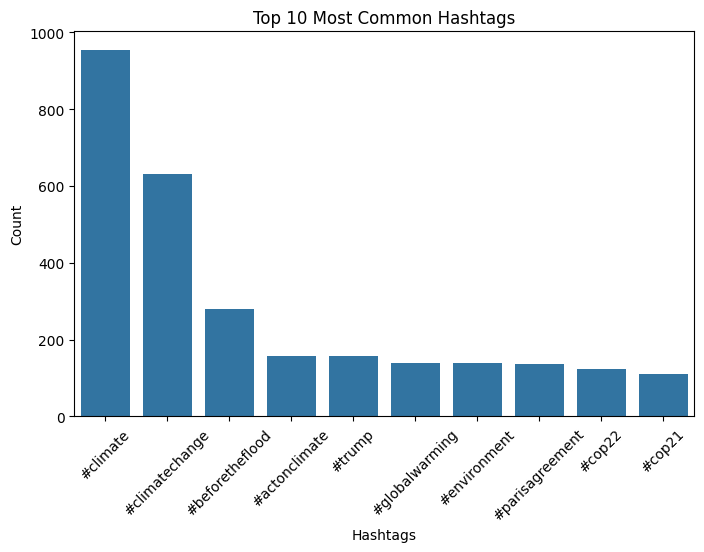

In [ ]:
import re
from collections import Counter

# Extract hashtags from tweets
hashtags = []
for tweet in data["message"].dropna():
    hashtags.extend(re.findall(r"#\w+", tweet.lower()))

# Count most common hashtags
top_hashtags = Counter(hashtags).most_common(10)
hashtags_df = pd.DataFrame(top_hashtags, columns=["Hashtag", "Count"])

# Plot chart
plt.figure(figsize=(8, 5))
sns.barplot(data=hashtags_df, x="Hashtag", y="Count")
plt.xticks(rotation=45)
plt.xlabel("Hashtags")
plt.ylabel("Count")
plt.title("Top 10 Most Common Hashtags")
plt.show()